# SPAIN

In [2]:
# move files that end with jpg to another folder
import os
import shutil

def move_files():
    source = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_spain/preprocessed data/images/'
    dest = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_spain/images/'
    for file in os.listdir(source):
        # file ends with jpg and contains `RGBhr`
        if file.endswith('.jpg') and 'RGBhr' in file:
            shutil.move(source + file, dest + file)
            print('Moved file: {}'.format(file))

In [ ]:
move_files()

In [ ]:
import os
import xml.etree.ElementTree as ET

# Define the folder paths
xml_folder = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_spain/preprocessed data/square_annotations1'  # Replace with the path to your XML folder
output_folder = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_spain/labels'  # Replace with the path to save YOLO txt files

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define a dictionary for class labels (assuming 'Poma' is class 0)
class_mapping = {'Poma': 0}

def convert_to_yolo(size, box):
    dw = 1.0 / size[0]  # width
    dh = 1.0 / size[1]  # height
    x = (box[0] + box[1]) / 2.0 - 1
    y = (box[2] + box[3]) / 2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

# Iterate through all XML files in the folder
for xml_file in os.listdir(xml_folder):
    if not xml_file.endswith('.xml'):
        continue

    # Parse XML
    tree = ET.parse(os.path.join(xml_folder, xml_file))
    root = tree.getroot()
    
    # Get image size
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)

    # Create a corresponding .txt file for each .xml
    txt_file = os.path.join(output_folder, os.path.splitext(xml_file)[0] + 'hr.txt')
    with open(txt_file, 'w') as f:
        # Iterate through all objects
        for obj in root.findall('object'):
            cls = obj.find('name').text
            if cls not in class_mapping:
                continue  # Ignore unrecognized classes
            
            cls_id = class_mapping[cls]
            xmlbox = obj.find('bbox')
            b = (int(xmlbox.find('xmin').text), int(xmlbox.find('xmax').text),
                 int(xmlbox.find('ymin').text), int(xmlbox.find('ymax').text))
            bb = convert_to_yolo((width, height), b)
            f.write(f"{cls_id} {' '.join([str(a) for a in bb])}\n")

print(f"Conversion complete! YOLO format annotations saved in: {output_folder}")

In [1]:
# delete folder
import shutil
shutil.rmtree('/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_spain/labels')

Height: 373, Width: 548


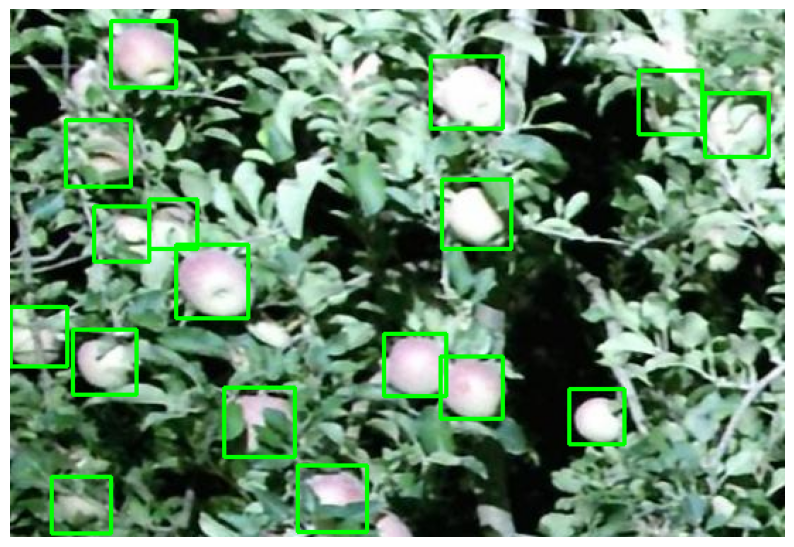

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_annotations(image_path, yolo_path):
    # Read the image using cv2
    image = cv2.imread(image_path)
    
    # Convert BGR (OpenCV format) to RGB for matplotlib display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Read the YOLO text file
    with open(yolo_path, 'r') as f:
        lines = f.readlines()
    
    # Get image dimensions
    height, width, _ = image.shape
    print(f'Height: {height}, Width: {width}')
    
    # Iterate over each line in the YOLO text file
    for line in lines:
        class_id, x_center, y_center, box_width, box_height = map(float, line.split())
        
        # Convert YOLO format to pixel coordinates
        x_center = int(x_center * width)
        y_center = int(y_center * height)
        box_width = int(box_width * width)
        box_height = int(box_height * height)
        
        # Calculate the top-left corner of the bounding box
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        
        # Draw the bounding box on the image (on a copy to avoid altering the original)
        image = cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height), (0, 255, 0), 2)
    
    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Define the paths to the image and YOLO text file
image_path = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_spain/images/BD04_inf_201724_004_01_RGBhr.jpg'
yolo_path = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_spain/labels/BD04_inf_201724_004_01_RGBhr.txt'

# Display the annotations on the image
display_annotations(image_path, yolo_path)


# USA

In [ ]:
# get image shape
import cv2

def get_image_shape(image_path):
    # Read the image using cv2
    image = cv2.imread(image_path)
    return image.shape

# Define the path to the image
image_path = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_usa/Robot2017/image-1.png'

# Get the shape of the image
image_shape = get_image_shape(image_path)
print(f"Image shape: {image_shape}")

In [ ]:
import os

# Constants
IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 960
CLASS_ID = 0  # Assuming only one class

def convert_to_yolo_format(x_min, y_min, width, height, img_width, img_height):
    # Normalize the bounding box parameters
    x_center = (x_min + width / 2) / img_width
    y_center = (y_min + height / 2) / img_height
    norm_width = width / img_width
    norm_height = height / img_height
    return x_center, y_center, norm_width, norm_height

def process_annotations(input_file, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    with open(input_file, 'r') as file:
        lines = file.readlines()
        
        for line in lines:
            # Split line by commas
            data = line.strip().split(',')
            image_path = data[0].strip()
            
            # Filter out any empty or invalid values
            bounding_boxes = [x for x in data[1:] if x.strip()]
            
            if len(bounding_boxes) % 4 != 0:
                print(f"Skipping {image_path} due to incomplete bounding box data.")
                continue
            
            bounding_boxes = list(map(int, bounding_boxes))  # Convert coordinates to integers
            
            # Create YOLO txt file for each image, saving it to the specified output directory
            output_file = os.path.join(output_dir, os.path.splitext(os.path.basename(image_path))[0] + ".txt")
            
            with open(output_file, 'w') as f_out:
                for i in range(0, len(bounding_boxes), 4):
                    x_min, y_min, width, height = bounding_boxes[i:i+4]
                    # Convert to YOLO format
                    x_center, y_center, norm_width, norm_height = convert_to_yolo_format(x_min, y_min, width, height, IMAGE_WIDTH, IMAGE_HEIGHT)
                    # Write to file in YOLO format
                    f_out.write(f"{CLASS_ID} {x_center} {y_center} {norm_width} {norm_height}\n")
                    
            print(f"Processed {image_path} -> {output_file}")

# Example usage
output_dir = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_usa/labels'
input_file = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_usa/Robot2017/annotation.txt'  # Replace with the path to your input file
process_annotations(input_file, output_dir)


Height: 960, Width: 1280


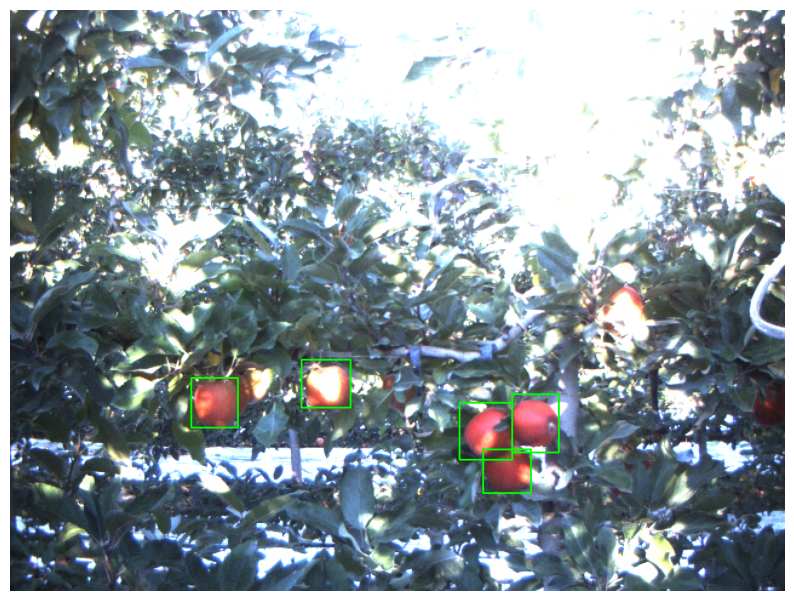

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_annotations(image_path, yolo_path):
    # Read the image using cv2
    image = cv2.imread(image_path)
    
    # Convert BGR (OpenCV format) to RGB for matplotlib display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Read the YOLO text file
    with open(yolo_path, 'r') as f:
        lines = f.readlines()
    
    # Get image dimensions
    height, width, _ = image.shape
    print(f'Height: {height}, Width: {width}')
    
    # Iterate over each line in the YOLO text file
    for line in lines:
        class_id, x_center, y_center, box_width, box_height = map(float, line.split())
        
        # Convert YOLO format to pixel coordinates
        x_center = int(x_center * width)
        y_center = int(y_center * height)
        box_width = int(box_width * width)
        box_height = int(box_height * height)
        
        # Calculate the top-left corner of the bounding box
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        
        # Draw the bounding box on the image (on a copy to avoid altering the original)
        image = cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height), (0, 255, 0), 2)
    
    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Define the paths to the image and YOLO text file
image_path = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_usa/images/image-50.png'
yolo_path = '/group/jmearlesgrp/data/ControlNet-Datasets/Apple-Detection/apple_detection_usa/labels/image-50.txt'

# Display the annotations on the image
display_annotations(image_path, yolo_path)
